In [1]:
ClearAll["Global`*"];
Quiet@Block[{Print}, << xAct`xCoba`]

In [3]:
DefManifold[M, 4, {a, b, c, d}]

** DefManifold: Defining manifold M. 
** DefVBundle: Defining vbundle TangentM. 


In [4]:
DefScalarFunction /@ {X, Y, Z};

** DefScalarFunction: Defining scalar function X. 
** DefScalarFunction: Defining scalar function Y. 
** DefScalarFunction: Defining scalar function Z. 


In [5]:
DefTensor[v[a], M]
v[a]//TeXForm

** DefTensor: Defining tensor v[a]. 


v(a)

In [7]:
DefTensor[w[-a], M]
w[-a]//TeXForm

** DefTensor: Defining tensor w[-a]. 


w(-a)

In [9]:
DefTensor[F[-a, -b], M, Symmetric[{-a, -b}]]
F[-a, -b]//TeXForm

** DefTensor: Defining tensor F[-a, -b]. 


F(-a,-b)

In [11]:
F[-b, -a] // ToCanonical//TeXForm

F(-a,-b)

In [12]:
DefTensor[G[-a, -b], M, Antisymmetric[{-a, -b}]]
G[-a, -b]//TeXForm

** DefTensor: Defining tensor G[-a, -b]. 


G(-a,-b)

In [14]:
G[-b, -a] // ToCanonical//TeXForm

-G(-a,-b)

In [15]:
v[a] v[b] G[-a, -b] // Simplify//TeXForm

v(a) v(b) G(-a,-b)

In [16]:
v[a] v[b] G[-a, -b] // ToCanonical//TeXForm

0

In [17]:
(v[a] v[b] F[-a, -b] + v[a] v[c] F[-a, -c]) // Simplify//TeXForm

v(a) (v(b) F(-a,-b)+v(c) F(-a,-c))

In [18]:
(v[a] v[b] F[-a, -b] + v[a] v[c] F[-a, -c]) // ToCanonical//TeXForm

2 v(a) v(b) F(-a,-b)

In [19]:
DefChart[Cartesian, M, {0, 1, 2, 3}, {t[], x[], y[], z[]}, 
  ChartColor -> Green];
DefChart[Spherical, M, {0, 1, 2, 3}, {t[], r[], \[Theta][], \[Phi][]},
   ChartColor -> Red];

** DefChart: Defining chart Cartesian. 
** DefTensor: Defining coordinate scalar t[]. 
** DefTensor: Defining coordinate scalar x[]. 
** DefTensor: Defining coordinate scalar y[]. 
** DefTensor: Defining coordinate scalar z[]. 
** DefMapping: Defining mapping Cartesian. 
** DefMapping: Defining inverse mapping iCartesian. 
** DefTensor: Defining mapping differential tensor 
 
>   diCartesian[-\[FormalA], iCartesiana]. 
** DefTensor: Defining mapping differential tensor 
 
>   dCartesian[-a, Cartesian\[FormalA]]. 
** DefBasis: Defining basis Cartesian. Coordinated basis.
** DefCovD: Defining parallel derivative PDCartesian[-a]. 
** DefTensor: Defining vanishing torsion tensor TorsionPDCartesian[a, -b, -c]
 
>   . 
** DefTensor: Defining symmetric Christoffel tensor 
 
>   ChristoffelPDCartesian[a, -b, -c]. 
** DefTensor: Defining vanishing Riemann tensor 
 
>   RiemannPDCartesian[-a, -b, -c, d]. 
** DefTensor: Defining vanishing Ricci tensor RicciPDCartesian[-a, -b]. 
** DefTensor: Defi

In [32]:
matrixComponent =
  {
   {X[t[]], Y[t[]], Y[t[]], Y[t[]]},
   {Y[t[]], X[t[]], 0, 0},
   {Y[t[]], 0, X[t[]], 0},
   {Y[t[]], 0, 0, X[t[]]}
   };
matrixComponent // MatrixForm//TeXForm

\left(
\begin{array}{cccc}
 X(t()) & Y(t()) & Y(t()) & Y(t()) \\
 Y(t()) & X(t()) & 0 & 0 \\
 Y(t()) & 0 & X(t()) & 0 \\
 Y(t()) & 0 & 0 & X(t()) \\
\end{array}
\right)

In [34]:
F[-a, -b] // ComponentArray//TeXForm

F(-a,-b)

In [35]:
F[{-a, -Cartesian}, {-b, -Cartesian}] // ComponentArray//TeXForm

\left(
\begin{array}{cccc}
 F(\{0,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{0,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{0,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{0,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
 F(\{1,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{1,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{1,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{1,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
 F(\{2,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{2,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{2,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{2,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
 F(\{3,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{3,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{3,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{3,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
\end{array}
\right)

In [38]:
ComponentValue[F[-{a,Cartesian}, -{b, Cartesian}]// ComponentArray, matrixComponent] //TeXForm

Added independent rule F[{0, -Cartesian}, {0, -Cartesian}] -> X[t[]]
 
>    for tensor F
Added independent rule F[{0, -Cartesian}, {1, -Cartesian}] -> Y[t[]]
 
>    for tensor F
Added independent rule F[{0, -Cartesian}, {2, -Cartesian}] -> Y[t[]]
 
>    for tensor F
Added independent rule F[{0, -Cartesian}, {3, -Cartesian}] -> Y[t[]]
 
>    for tensor F
Added dependent rule F[{1, -Cartesian}, {0, -Cartesian}] -> 
 
>    F[{0, -Cartesian}, {1, -Cartesian}] for tensor F
Added independent rule F[{1, -Cartesian}, {1, -Cartesian}] -> X[t[]]
 
>    for tensor F
Added independent rule F[{1, -Cartesian}, {2, -Cartesian}] -> 0 for tensor F
Added independent rule F[{1, -Cartesian}, {3, -Cartesian}] -> 0 for tensor F
Added dependent rule F[{2, -Cartesian}, {0, -Cartesian}] -> 
 
>    F[{0, -Cartesian}, {2, -Cartesian}] for tensor F
Added dependent rule F[{2, -Cartesian}, {1, -Cartesian}] -> 
 
>    F[{1, -Cartesian}, {2, -Cartesian}] for tensor F
Added independent rule F[{2, -Cartesian}, {2, -Car

\{\{F(\{0,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   X(t()),F(\{0,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   Y(t()),F(\{0,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   Y(t()),F(\{0,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to\
 
>   Y(t())\},\{F(\{1,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   Y(t()),F(\{1,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   X(t()),F(\{1,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   0,F(\{1,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to\
 
>   0\},\{F(\{2,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   Y(t()),F(\{2,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   0,F(\{2,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   X(t()),F(\{2,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to\
 
>   0\},\{F(\{3,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   Y(t()),F(\{3,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   0,F(\{3,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   0,F(\{3,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to X(t())\}\}

In [39]:
ComponentValue[ G[{-a, -Cartesian}, {-b, -Cartesian}]//ComponentArray, matrixComponent]//TeXForm

Added dependent rule G[{0, -Cartesian}, {0, -Cartesian}] -> 0 for tensor G
Added independent rule G[{0, -Cartesian}, {1, -Cartesian}] -> Y[t[]]
 
>    for tensor G
Added independent rule G[{0, -Cartesian}, {2, -Cartesian}] -> Y[t[]]
 
>    for tensor G
Added independent rule G[{0, -Cartesian}, {3, -Cartesian}] -> Y[t[]]
 
>    for tensor G
Added dependent rule G[{1, -Cartesian}, {0, -Cartesian}] -> 
 
>    -G[{0, -Cartesian}, {1, -Cartesian}] for tensor G
Replaced independent rule G[{0, -Cartesian}, {1, -Cartesian}] -> Y[t[]] by 
 
>   G[{0, -Cartesian}, {1, -Cartesian}] -> -Y[t[]] for tensor G
Added dependent rule G[{1, -Cartesian}, {1, -Cartesian}] -> 0 for tensor G
Added independent rule G[{1, -Cartesian}, {2, -Cartesian}] -> 0 for tensor G
Added independent rule G[{1, -Cartesian}, {3, -Cartesian}] -> 0 for tensor G
Added dependent rule G[{2, -Cartesian}, {0, -Cartesian}] -> 
 
>    -G[{0, -Cartesian}, {2, -Cartesian}] for tensor G
Replaced independent rule G[{0, -Cartesian}, {2, -C

\{\{G(\{0,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   0,G(\{0,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   Y(t()),G(\{0,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   Y(t()),G(\{0,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to\
 
>   Y(t())\},\{G(\{1,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   Y(t()),G(\{1,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   0,G(\{1,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   0,G(\{1,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to\
 
>   0\},\{G(\{2,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   Y(t()),G(\{2,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   0,G(\{2,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   0,G(\{2,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to\
 
>   0\},\{G(\{3,-\text{Cartesian}\},\{0,-\text{Cartesian}\})\to\
 
>   Y(t()),G(\{3,-\text{Cartesian}\},\{1,-\text{Cartesian}\})\to\
 
>   0,G(\{3,-\text{Cartesian}\},\{2,-\text{Cartesian}\})\to\
 
>   0,G(\{3,-\text{Cartesian}\},\{3,-\text{Cartesian}\})\to 0\}\}

In [40]:
F[-a, -b]//TeXForm

F(-a,-b)

In [43]:
F[-1, -1]//TeXForm

F(-1,-1)

In [44]:
F[-a, -b] // ToBasis[Cartesian]//TeXForm

F(\{-a,-\text{Cartesian}\},\{-b,-\text{Cartesian}\})

In [45]:
F[-a, -b] // ToBasis[Cartesian] // ComponentArray//TeXForm

\left(
\begin{array}{cccc}
 F(\{0,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{0,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{0,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{0,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
 F(\{1,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{1,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{1,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{1,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
 F(\{2,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{2,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{2,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{2,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
 F(\{3,-\text{Cartesian}\},\{0,-\text{Cartesian}\}) &\
 
>   F(\{3,-\text{Cartesian}\},\{1,-\text{Cartesian}\}) &\
 
>   F(\{3,-\text{Cartesian}\},\{2,-\text{Cartesian}\}) &\
 
>   F(\{3,-\text{Cartesian}\},\{3,-\text{Cartesian}\}) \\
\end{array}
\right)

In [46]:
F[-a, -b] // ToBasis[Cartesian] // ComponentArray // ToValues//TeXForm

\left(
\begin{array}{cccc}
 X(t()) & Y(t()) & Y(t()) & Y(t()) \\
 Y(t()) & X(t()) & 0 & 0 \\
 Y(t()) & 0 & X(t()) & 0 \\
 Y(t()) & 0 & 0 & X(t()) \\
\end{array}
\right)

In [49]:
F[-a, -b] // ToBasis[Cartesian] // ComponentArray // ToValues //TeXForm
%[[1, 1]]//TeXForm

\left(
\begin{array}{cccc}
 X(t()) & Y(t()) & Y(t()) & Y(t()) \\
 Y(t()) & X(t()) & 0 & 0 \\
 Y(t()) & 0 & X(t()) & 0 \\
 Y(t()) & 0 & 0 & X(t()) \\
\end{array}
\right)
\{X(t()),Y(t()),Y(t()),Y(t())\}

In [85]:
MyArrayComponents[expr_] := 
 expr // ToBasis[Cartesian] // ComponentArray // ToValues // 
     ToValues // ToValues // Simplify // MatrixForm

In [86]:
F[-a, -b] // MyArrayComponents//TeXForm

\left(
\begin{array}{cccc}
 X(t()) & 0 & 0 & 0 \\
 0 & X(t()) & 0 & 0 \\
 0 & 0 & X(t()) & 0 \\
 0 & 0 & 0 & X(t()) \\
\end{array}
\right)

In [87]:
G[-a, -b] // MyArrayComponents//TeXForm

\left(
\begin{array}{cccc}
 0 & -Y(t()) & -Y(t()) & -Y(t()) \\
 Y(t()) & 0 & 0 & 0 \\
 Y(t()) & 0 & 0 & 0 \\
 Y(t()) & 0 & 0 & 0 \\
\end{array}
\right)

-X[t[]]   0         0         0

          X[t[]]
          -------
                2
0         Z[t[]]    0         0

                    X[t[]]
                    -------
                          2
0         0         Z[t[]]    0

                              X[t[]]
                              -------
                                    2
0         0         0         Z[t[]]
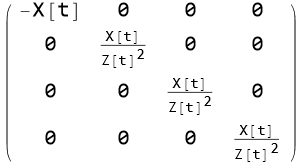

In [88]:
F[a, -b] // MyArrayComponents

In [89]:
metricMatrix =
  {
   {-1, 0, 0, 0},
   {0, Z[t[]]^2, 0, 0},
   {0, 0, Z[t[]]^2, 0},
   {0, 0, 0, Z[t[]]^2}
   };
metricMatrix // MatrixForm//TeXForm

\left(
\begin{array}{cccc}
 -1 & 0 & 0 & 0 \\
 0 & Z(t())^2 & 0 & 0 \\
 0 & 0 & Z(t())^2 & 0 \\
 0 & 0 & 0 & Z(t())^2 \\
\end{array}
\right)

DefMetric::old: There are already metrics {g} in vbundle TangentM.

ValidateSymbol::used: Symbol g is already used as a metric.

g[{0, -Cartesian}, {0, -Cartesian}] -> -1
 

>    g[{0, -Cartesian}, {1, -Cartesian}] -> 0
 

>    g[{0, -Cartesian}, {2, -Cartesian}] -> 0
 

>    g[{0, -Cartesian}, {3, -Cartesian}] -> 0


g[{1, -Cartesian}, {0, -Cartesian}] -> 0         g[{1, -Cartesian}, {1, -Cartesian}] -> 
 
           2
>    Z[t[]]    g[{1, -Cartesian}, {2, -Cartesian}] -> 0
 

>    g[{1, -Cartesian}, {3, -Cartesian}] -> 0


g[{2, -Cartesian}, {0, -Cartesian}] -> 0
 

>    g[{2, -Cartesian}, {1, -Cartesian}] -> 0         g[{2, -Cartesian}, 
 
                                2
>     {2, -Cartesian}] -> Z[t[]]    g[{2, -Cartesian}, {3, -Cartesian}] -> 0


g[{3, -Cartesian}, {0, -Cartesian}] -> 0
 

>    g[{3, -Cartesian}, {1, -Cartesian}] -> 0
 

>    g[{3, -Cartesian}, {2, -Cartesian}] -> 0         g[{3, -Cartesian}, 
 
                                2
>     {3, -Cartesian}] -> Z[t[]]
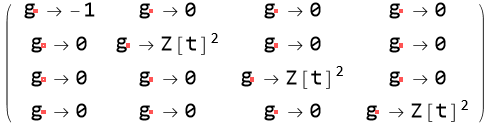

In [91]:
DefMetric[-1, g[-a, -b], covd, {";", "\[Del]"}, PrintAs -> "g"];
MatrixForm@MetricInBasis[g, -Cartesian, metricMatrix]

In [66]:
MetricCompute[g, Cartesian, All]

** DefTensor: Defining weight +2 density DetgCartesian[]. Determinant.
** DefTensor: Defining tensor ChristoffelcovdPDCartesian[a, -b, -c]. 


In [93]:
g[{a, Cartesian}, {b, Cartesian}] // MyArrayComponents//TeXForm

\left(
\begin{array}{cccc}
 -1 & 0 & 0 & 0 \\
 0 & \frac{1}{Z(t())^2} & 0 & 0 \\
 0 & 0 & \frac{1}{Z(t())^2} & 0 \\
 0 & 0 & 0 & \frac{1}{Z(t())^2} \\
\end{array}
\right)

In [69]:
ChangeComponents[F[{a, Cartesian}, -{b, Cartesian}], 
  F[-{a, Cartesian}, -{b, Cartesian}]]; 
ChangeComponents[F[-{a, Cartesian}, {b, Cartesian}], 
  F[-{a, Cartesian}, -{b, Cartesian}]]; 

Added independent rule F[{0, Cartesian}, {0, -Cartesian}] -> 
 
>    F[{0, -Cartesian}, {0, -Cartesian}] g[{0, Cartesian}, {0, Cartesian}] + 
 
>     F[{0, -Cartesian}, {1, -Cartesian}] g[{0, Cartesian}, {1, Cartesian}] + 
 
>     F[{0, -Cartesian}, {2, -Cartesian}] g[{0, Cartesian}, {2, Cartesian}] + 
 
>     F[{0, -Cartesian}, {3, -Cartesian}] g[{0, Cartesian}, {3, Cartesian}]\
 
>    for tensor F
Added independent rule F[{0, Cartesian}, {1, -Cartesian}] -> 
 
>    F[{0, -Cartesian}, {1, -Cartesian}] g[{0, Cartesian}, {0, Cartesian}] + 
 
>     F[{1, -Cartesian}, {1, -Cartesian}] g[{0, Cartesian}, {1, Cartesian}] + 
 
>     F[{1, -Cartesian}, {2, -Cartesian}] g[{0, Cartesian}, {2, Cartesian}] + 
 
>     F[{1, -Cartesian}, {3, -Cartesian}] g[{0, Cartesian}, {3, Cartesian}]\
 
>    for tensor F
Added independent rule F[{0, Cartesian}, {2, -Cartesian}] -> 
 
>    F[{0, -Cartesian}, {2, -Cartesian}] g[{0, Cartesian}, {0, Cartesian}] + 
 
>     F[{1, -Cartesian}, {2, -Cartesian}] g[{0, Ca

Computed F[{a, Cartesian}, {-b, -Cartesian}] -> 
 
>    F[{-c, -Cartesian}, {-b, -Cartesian}] g[{a, Cartesian}, {c, Cartesian}]\
 
>    in 1.1497997 Seconds
Found again independent rule F[{0, Cartesian}, {0, -Cartesian}] -> 
 
>    F[{0, -Cartesian}, {0, -Cartesian}] g[{0, Cartesian}, {0, Cartesian}] + 
 
>     F[{0, -Cartesian}, {1, -Cartesian}] g[{0, Cartesian}, {1, Cartesian}] + 
 
>     F[{0, -Cartesian}, {2, -Cartesian}] g[{0, Cartesian}, {2, Cartesian}] + 
 
>     F[{0, -Cartesian}, {3, -Cartesian}] g[{0, Cartesian}, {3, Cartesian}]\
 
>    for tensor F
Found again independent rule F[{0, -Cartesian}, {1, Cartesian}] -> 
 
>    F[{0, -Cartesian}, {0, -Cartesian}] g[{0, Cartesian}, {1, Cartesian}] + 
 
>     F[{0, -Cartesian}, {1, -Cartesian}] g[{1, Cartesian}, {1, Cartesian}] + 
 
>     F[{0, -Cartesian}, {2, -Cartesian}] g[{1, Cartesian}, {2, Cartesian}] + 
 
>     F[{0, -Cartesian}, {3, -Cartesian}] g[{1, Cartesian}, {3, Cartesian}]\
 
>    for tensor F
Found again independent r

In [94]:
F[-a, b] // MyArrayComponents//TeXForm

\left(
\begin{array}{cccc}
 -X(t()) & 0 & 0 & 0 \\
 0 & \frac{X(t())}{Z(t())^2} & 0 & 0 \\
 0 & 0 & \frac{X(t())}{Z(t())^2} & 0 \\
 0 & 0 & 0 & \frac{X(t())}{Z(t())^2} \\
\end{array}
\right)

In [95]:
covd[c]@g[a, b]//TeXForm

0

X[t[]]   0        0        0

0        X[t[]]   0        0

0        0        X[t[]]   0

0        0        0        X[t[]]
{{F[{0, -Cartesian}, {0, -Cartesian}] -> X[t[]], 
 
>    F[{0, -Cartesian}, {1, -Cartesian}] -> 0, F[{0, -Cartesian}, {2, -Cartesian}] -> 0, 
 
>    F[{0, -Cartesian}, {3, -Cartesian}] -> 0}, 
 
>   {F[{1, -Cartesian}, {0, -Cartesian}] -> 0, 
 
>    F[{1, -Cartesian}, {1, -Cartesian}] -> X[t[]], 
 
>    F[{1, -Cartesian}, {2, -Cartesian}] -> 0, F[{1, -Cartesian}, {3, -Cartesian}] -> 0}\
 
>    , {F[{2, -Cartesian}, {0, -Cartesian}] -> 0, 
 
>    F[{2, -Cartesian}, {1, -Cartesian}] -> 0, 
 
>    F[{2, -Cartesian}, {2, -Cartesian}] -> X[t[]], 
 
>    F[{2, -Cartesian}, {3, -Cartesian}] -> 0}, 
 
>   {F[{3, -Cartesian}, {0, -Cartesian}] -> 0, F[{3, -Cartesian}, {1, -Cartesian}] -> 0, 
 
>    F[{3, -Cartesian}, {2, -Cartesian}] -> 0, 
 
>    F[{3, -Cartesian}, {3, -Cartesian}] -> X[t[]]}}
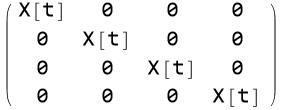

In [109]:
matrixComponent2 =
  {
   {X[t[]], 0, 0, 0},
   {0, X[t[]], 0, 0},
   {0, 0, X[t[]], 0},
   {0, 0, 0, X[t[]]}
   };
matrixComponent2 // MatrixForm
ComponentValue[ F[-{a, Cartesian}, -{b, Cartesian}] // ComponentArray, matrixComponent2]

In [112]:
covd[a]@F[-a, -b]//TeXForm

\text{covd}(a)(F(-a,-b))

ChristoffelcovdPDCartesian[a, -b, -c]


0                0                0                0


0                Z[t[]] Z'[t[]]   0                0


0                0                Z[t[]] Z'[t[]]   0


0                0                0                Z[t[]] Z'[t[]]

                 Z'[t[]]
                 -------
0                Z[t[]]           0                0
Z'[t[]]
-------
Z[t[]]           0                0                0


0                0                0                0


0                0                0                0

                                  Z'[t[]]
                                  -------
0                0                Z[t[]]           0


0                0                0                0
Z'[t[]]
-------
Z[t[]]           0                0                0


0                0                0                0

                                                   Z'[t[]]
                                                   -------
0                0                0                Z[t[]]


0                0                0                0


0                0                0                0
Z'[t[]]
-------
Z[t[]]           0                0                0
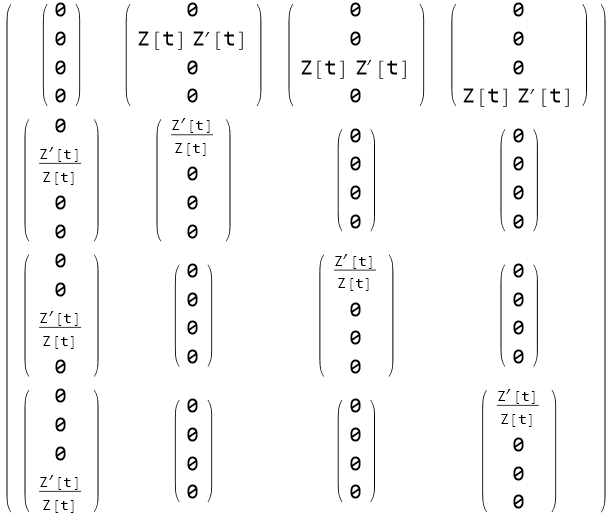

In [113]:
ChristoffelcovdPDCartesian[a, -b, -c]
% // MyArrayComponents

In [115]:
Part[MyArrayComponents@ChristoffelcovdPDCartesian[a, -b, -c], 
  1][[1, 1]]//TeXForm
Part[MyArrayComponents@ChristoffelcovdPDCartesian[a, -b, -c], 
  1][[2, 2]]//TeXForm

\{0,0,0,0\}
\left\{\frac{Z'(t())}{Z(t())},0,0,0\right\}

In [120]:
covd[a]@F[-a, -b] // CovDToChristoffel

-(Christoffelcovd[d$88374, a, -b] F[-a, -d$88374]) - 
 
>   Christoffelcovd[d$88373, a, -a] F[-d$88373, -b] + PD[a][F[-a, -b]]

In [121]:
Einsteincovd[-a, -b] // MyArrayComponents//TeXForm

\left(
\begin{array}{cccc}
 \frac{3 Z'(t())^2}{Z(t())^2} & 0 & 0 & 0 \\
 0 & -2 Z(t()) Z''(t())-Z'(t())^2 & 0 & 0 \\
 0 & 0 & -2 Z(t()) Z''(t())-Z'(t())^2 & 0 \\
 0 & 0 & 0 & -2 Z(t()) Z''(t())-Z'(t())^2 \\
\end{array}
\right)

In [147]:
Basis[{a, Cartesian}, {-b, -Spherical}]

Basis[{-b, -Spherical}, {a, Cartesian}]

In [148]:
x /: InChart[x[], Spherical] = 
  Function[{t, r, \[Theta], \[Phi]}, r Cos[\[Phi]] Sin[\[Theta]]];
y /: InChart[y[], Spherical] = 
  Function[{t, r, \[Theta], \[Phi]}, r Sin[\[Phi]] Sin[\[Theta]]];
z /: InChart[z[], Spherical] = 
  Function[{t, r, \[Theta], \[Phi]}, r Cos[\[Theta]]];
r /: InChart[r[], Cartesian] = 
  Function[{t, x, y, z}, Sqrt[x^2 + y^2 + z^2]];
\[Theta] /: InChart[\[Theta][], Cartesian] = 
  Function[{t, x, y, z}, ArcCos[z/Sqrt[x^2 + y^2 + z^2]]];
\[Phi] /: InChart[\[Phi][], Cartesian] = 
  Function[{t, x, y, z}, ArcTan[x, y]];
$Assumptions = And[
   {t[], x[], y[], z[], r[], \[Phi][], \[Theta][]} \[Element] Reals,
   r[] >= 0,
   0 <= \[Theta][] <= Pi,
   0 <= \[Phi][] < 2 Pi
   ];

In [155]:
ScalarsOfChart[Cartesian]
InChart[Spherical] /@ %
(InChart[Cartesian] /@ %) // Simplify

{t[], x[], y[], z[]}
{t[], Cos[ϕ[]] r[] Sin[θ[]], r[] Sin[θ[]] Sin[ϕ[]], Cos[θ[]] r[]}
{t[], x[], y[], z[]}

Basis[{0, -Spherical}, {0, Cartesian}] -> 1
  
 >    Basis[{1, -Spherical}, {0, Cartesian}] -> 0
  
{>    Basis[{2, -Spherical}, {0, Cartesian}] -> 0                                , 
  
 >    Basis[{3, -Spherical}, {0, Cartesian}] -> 0

 Basis[{0, -Spherical}, {1, Cartesian}] -> 0
  
 >    Basis[{1, -Spherical}, {1, Cartesian}] -> Cos[ϕ[]] Sin[θ[]]
  
 >    Basis[{2, -Spherical}, {1, Cartesian}] -> Cos[θ[]] Cos[ϕ[]] r[]      Basis[
  
 >     {3, -Spherical}, {1, Cartesian}] -> -(r[] Sin[θ[]] Sin[ϕ[]])

 Basis[{0, -Spherical}, {2, Cartesian}] -> 0
  
 >    Basis[{1, -Spherical}, {2, Cartesian}] -> Sin[θ[]] Sin[ϕ[]]
  
 >    Basis[{2, -Spherical}, {2, Cartesian}] -> Cos[θ[]] r[] Sin[ϕ[]]
  
 >    Basis[{3, -Spherical}, {2, Cartesian}] -> Cos[ϕ[]] r[] Sin[θ[]]

 Basis[{0, -Spherical}, {3, Cartesian}] -> 0
  
 >    Basis[{1, -Spherical}, {3, Cartesian}] -> Cos[θ[]]
  
 >    Basis[{2, -Spherical}, {3, Cartesian}] -> -(r[] Sin[θ[]])
  
 >    Basis[{3, -Spherical}, {3, Cartesian}] -> 0
 




    Basis[{0, -Cartesian}, {0, Spherical}] -> 1
>    
    >    
     




    >    Basis[{1, -Cartesian}, {0, Spherical}] -> 0
     
    >    
     




    >    Basis[{2, -Cartesian}, {0, Spherical}] -> 0
     
    >    
     




    >    Basis[{3, -Cartesian}, {0, Spherical}] -> 0





    Basis[{0, -Cartesian}, {1, Spherical}] -> 0
     
    >    
     

                                                             x[]
         Basis[{1, -Cartesian}, {1, Spherical}] -> ------------------------
                                                           2      2      2
    >                                              Sqrt[x[]  + y[]  + z[] ]
     
    >    
     

                                                             y[]
         Basis[{2, -Cartesian}, {1, Spherical}] -> ------------------------
                                                           2      2      2
    >                                              Sqrt[x[]  + y[]  + z[] ]
     
    >    
     

                                                             z[]
         Basis[{3, -Cartesian}, {1, Spherical}] -> ------------------------
                                                           2      2      2
    >                                              Sqrt[x[]  + y[]  + z[] ]





    Basis[{0, -Cartesian}, {2, Spherical}] -> 0
     
    >    
     

                                                                  x[] z[]
         Basis[{1, -Cartesian}, {2, Spherical}] -> --------------------------------------
                                                           2      2      2      2      2
    >                                              Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
     
    >    
     

                                                                  y[] z[]
         Basis[{2, -Cartesian}, {2, Spherical}] -> --------------------------------------
                                                           2      2      2      2      2
    >                                              Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
     
    >    
     
                                                             2      2
                                                     Sqrt[x[]  + y[] ]
         Basis[{3, -Cartesian}, {2, Spherical}] -> -(------------------)
                                                        2      2      2
    >                                                x[]  + y[]  + z[]





    Basis[{0, -Cartesian}, {3, Spherical}] -> 0
     
    >    
     

                                                         y[]
         Basis[{1, -Cartesian}, {3, Spherical}] -> -(-----------)
                                                        2      2
    >                                                x[]  + y[]
     
    >    
     

                                                       x[]
         Basis[{2, -Cartesian}, {3, Spherical}] -> -----------
                                                      2      2
    >       
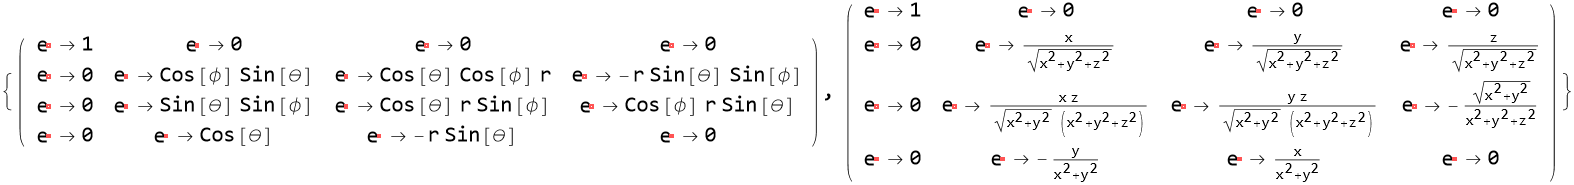

In [158]:
Quiet@Block[{Print}, << xAct`xTras`]
MatrixForm /@ ComputeBasisValues[Cartesian, Spherical]

In [172]:
F[-a, -b] // ToBasis[Cartesian] // ComponentArray

{{F[{0, -Cartesian}, {0, -Cartesian}], F[{0, -Cartesian}, {1, -Cartesian}], 
 
>    F[{0, -Cartesian}, {2, -Cartesian}], F[{0, -Cartesian}, {3, -Cartesian}]}, 
 
>   {F[{1, -Cartesian}, {0, -Cartesian}], F[{1, -Cartesian}, {1, -Cartesian}], 
 
>    F[{1, -Cartesian}, {2, -Cartesian}], F[{1, -Cartesian}, {3, -Cartesian}]}, 
 
>   {F[{2, -Cartesian}, {0, -Cartesian}], F[{2, -Cartesian}, {1, -Cartesian}], 
 
>    F[{2, -Cartesian}, {2, -Cartesian}], F[{2, -Cartesian}, {3, -Cartesian}]}, 
 
>   {F[{3, -Cartesian}, {0, -Cartesian}], F[{3, -Cartesian}, {1, -Cartesian}], 
 
>    F[{3, -Cartesian}, {2, -Cartesian}], F[{3, -Cartesian}, {3, -Cartesian}]}}

In [173]:
% // SeparateBasis[Spherical] // SeparateBasis[Spherical]

{{Basis[{0, -Cartesian}, {a, Spherical}] Basis[{0, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}], 
 
>    Basis[{0, -Cartesian}, {a, Spherical}] Basis[{1, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}], 
 
>    Basis[{0, -Cartesian}, {a, Spherical}] Basis[{2, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}], 
 
>    Basis[{0, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}]}, 
 
>   {Basis[{0, -Cartesian}, {a, Spherical}] Basis[{1, -Cartesian}, {b, Spherical}] 
 
>     F[{-b, -Spherical}, {-a, -Spherical}], 
 
>    Basis[{1, -Cartesian}, {a, Spherical}] Basis[{1, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}], 
 
>    Basis[{1, -Cartesian}, {a, Spherical}] Basis[{2, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}], 
 
>    Basis[{1, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}]}, 
 
>   {Basis[{0, -Cartesian}, {a, Spherical}] Basis[{2, -Cartesian}, {b, Spherical}] 
 
>     F[{-b, -Spherical}, {-a, -Spherical}], 
 
>    Basis[{1, -Cartesian}, {a, Spherical}] Basis[{2, -Cartesian}, {b, Spherical}] 
 
>     F[{-b, -Spherical}, {-a, -Spherical}], 
 
>    Basis[{2, -Cartesian}, {a, Spherical}] Basis[{2, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}], 
 
>    Basis[{2, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}]}, 
 
>   {Basis[{0, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-b, -Spherical}, {-a, -Spherical}], 
 
>    Basis[{1, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-b, -Spherical}, {-a, -Spherical}], 
 
>    Basis[{2, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-b, -Spherical}, {-a, -Spherical}], 
 
>    Basis[{3, -Cartesian}, {a, Spherical}] Basis[{3, -Cartesian}, {b, Spherical}] 
 
>     F[{-a, -Spherical}, {-b, -Spherical}]}}

In [174]:
% // TraceBasisDummy // ToValues // Simplify // MatrixForm//TeXForm

\left(
\begin{array}{cccc}
 F(\{0,-\text{Spherical}\},\{0,-\text{Spherical}\}) & \frac{x()\
 
>   F(\{0,-\text{Spherical}\},\{1,-\text{Spherical}\})}{\sqrt{x()^2+y()^2+z()^2}}+\frac{\
 
>   x() z() F(\{0,-\text{Spherical}\},\{2,-\text{Spherical}\})}{\sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)}-\frac{y()\
 
>   F(\{0,-\text{Spherical}\},\{3,-\text{Spherical}\})}{x()^2+y()^2} & \frac{y()\
 
>   F(\{0,-\text{Spherical}\},\{1,-\text{Spherical}\})}{\sqrt{x()^2+y()^2+z()^2}}+\frac{\
 
>   y() z() F(\{0,-\text{Spherical}\},\{2,-\text{Spherical}\})}{\sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)}+\frac{x()\
 
>   F(\{0,-\text{Spherical}\},\{3,-\text{Spherical}\})}{x()^2+y()^2} & \frac{z()\
 
>   F(\{0,-\text{Spherical}\},\{1,-\text{Spherical}\})}{\sqrt{x()^2+y()^2+z()^2}}-\frac{\
 
>   \sqrt{x()^2+y()^2}\
 
>   F(\{0,-\text{Spherical}\},\{2,-\text{Spherical}\})}{x()^2+y()^2+z()^2} \\
 \frac{x()\
 
>   F(\{1,-\text{Spherical}\},\{0,-\text{Spherical}\})}{\sqrt{x()^2+y()^2+z()^2}}+\frac{\
 
>   x() z() F(\{2,-\text{Spherical}\},\{0,-\text{Spherical}\})}{\sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)}-\frac{y()\
 
>   F(\{3,-\text{Spherical}\},\{0,-\text{Spherical}\})}{x()^2+y()^2} & \frac{x()^2 z()^2\
 
>   \left(x()^2+y()^2\right) F(\{2,-\text{Spherical}\},\{2,-\text{Spherical}\})+x()^2\
 
>   \left(x()^2+y()^2\right)^2 \left(x()^2+y()^2+z()^2\right)\
 
>   F(\{1,-\text{Spherical}\},\{1,-\text{Spherical}\})+x()^2 z()\
 
>   \left(x()^2+y()^2\right)^{3/2} \sqrt{x()^2+y()^2+z()^2}\
 
>   F(\{1,-\text{Spherical}\},\{2,-\text{Spherical}\})+x()^2 z()\
 
>   \left(x()^2+y()^2\right)^{3/2} \sqrt{x()^2+y()^2+z()^2}\
 
>   F(\{2,-\text{Spherical}\},\{1,-\text{Spherical}\})-x() y() \left(x()^2+y()^2\right)\
 
>   \left(x()^2+y()^2+z()^2\right)^{3/2}\
 
>   F(\{1,-\text{Spherical}\},\{3,-\text{Spherical}\})-x() y() \left(x()^2+y()^2\right)\
 
>   \left(x()^2+y()^2+z()^2\right)^{3/2}\
 
>   F(\{3,-\text{Spherical}\},\{1,-\text{Spherical}\})-x() y() z() \sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)\
 
>   F(\{2,-\text{Spherical}\},\{3,-\text{Spherical}\})-x() y() z() \sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)\
 
>   F(\{3,-\text{Spherical}\},\{2,-\text{Spherical}\})+y()^2\
 
>   \left(x()^2+y()^2+z()^2\right)^2\
 
>   F(\{3,-\text{Spherical}\},\{3,-\text{Spherical}\})}{\left(x()^2+y()^2\right)^2\
 
>   \left(x()^2+y()^2+z()^2\right)^2} & \frac{x()^2 \left(x()^2+y()^2\right)\
 
>   \left(x()^2+y()^2+z()^2\right)^{3/2}\
 
>   F(\{1,-\text{Spherical}\},\{3,-\text{Spherical}\})+x()^2 z() \sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)\
 
>   F(\{2,-\text{Spherical}\},\{3,-\text{Spherical}\})+x() y() z()^2\
 
>   \left(x()^2+y()^2\right) F(\{2,-\text{Spherical}\},\{2,-\text{Spherical}\})-x() y()\
 
>   \left(x()^2+y()^2+z()^2\right)^2\
 
>   F(\{3,-\text{Spherical}\},\{3,-\text{Spherical}\})+x() y()\
 
>   \left(x()^2+y()^2\right)^2 \left(x()^2+y()^2+z()^2\right)\
 
>   F(\{1,-\text{Spherical}\},\{1,-\text{Spherical}\})+x() y() z()\
 
>   \left(x()^2+y()^2\right)^{3/2} \sqrt{x()^2+y()^2+z()^2}\
 
>   F(\{1,-\text{Spherical}\},\{2,-\text{Spherical}\})+x() y() z()\
 
>   \left(x()^2+y()^2\right)^{3/2} \sqrt{x()^2+y()^2+z()^2}\
 
>   F(\{2,-\text{Spherical}\},\{1,-\text{Spherical}\})-y()^2 \left(x()^2+y()^2\right)\
 
>   \left(x()^2+y()^2+z()^2\right)^{3/2}\
 
>   F(\{3,-\text{Spherical}\},\{1,-\text{Spherical}\})-y()^2 z() \sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)\
 
>   F(\{3,-\text{Spherical}\},\{2,-\text{Spherical}\})}{\left(x()^2+y()^2\right)^2\
 
>   \left(x()^2+y()^2+z()^2\right)^2} & \frac{x() z()^2\
 
>   F(\{2,-\text{Spherical}\},\{1,-\text{Spherical}\})}{\sqrt{x()^2+y()^2}\
 
>   \left(x()^2+y()^2+z()^2\right)^{3/2}}-\frac{y() z()\
 
>   F(\{3,-\text{Spherical}\},\{1,-\text{Spherical}\})}{\left(x()^2+y()^2\right)\
 
>   \sqrt{x()^2+y()^2+z()^2}}+\frac{x() z()\
 
>   F(\{1,-\text{Spherical}\},\{1,-\text{Spherical}\})}{x()^2+y()^2+z()^2}-\frac{x() z()\
 
>   F(\{2,-\t

In [175]:
ClearAll["Global`*"];
Quiet@Block[{Print}, << xAct`xCoba`]
DefManifold[M, 4, {a, b, c, d}];
DefScalarFunction /@ {X, Y, Z};
metricMatrix =
  {
   {-1, 0, 0, 0},
   {0, Z[t[]]^2, 0, 0},
   {0, 0, Z[t[]]^2, 0},
   {0, 0, 0, Z[t[]]^2}
   };
matrixComponent =
  {
   {X[t[]], 0, 0, 0},
   {0, X[t[]], 0, 0},
   {0, 0, X[t[]], 0},
   {0, 0, 0, X[t[]]}
   };
DefChart[Cartesian, M, {0, 1, 2, 3}, {t[], x[], y[], z[]}, 
  ChartColor -> Green];

** DefManifold: Defining manifold M. 
** DefVBundle: Defining vbundle TangentM. 
** DefScalarFunction: Defining scalar function X. 
** DefScalarFunction: Defining scalar function Y. 
** DefScalarFunction: Defining scalar function Z. 
** DefChart: Defining chart Cartesian. 
** DefTensor: Defining coordinate scalar t[]. 
** DefTensor: Defining coordinate scalar x[]. 
** DefTensor: Defining coordinate scalar y[]. 
** DefTensor: Defining coordinate scalar z[]. 
** DefMapping: Defining mapping Cartesian. 
** DefMapping: Defining inverse mapping iCartesian. 
** DefTensor: Defining mapping differential tensor 
 
>   diCartesian[-\[FormalE], iCartesiana]. 
** DefTensor: Defining mapping differential tensor 
 
>   dCartesian[-a, Cartesian\[FormalE]]. 
** DefBasis: Defining basis Cartesian. Coordinated basis.
** DefCovD: Defining parallel derivative PDCartesian[-a]. 
** DefTensor: Defining vanishing torsion tensor TorsionPDCartesian[a, -b, -c]
 
>   . 
** DefTensor: Defining symmetric Christoffe

In [182]:
g = CTensor[metricMatrix, {-Cartesian, -Cartesian}];

2                      2                      2
CTensor[{{-1, 0, 0, 0}, {0, Z[t[]] , 0, 0}, {0, 0, Z[t[]] , 0}, {0, 0, 0, Z[t[]] }}, 
 
>    {-Cartesian, -Cartesian}, 0][-a, -b]
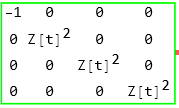

In [184]:
g[-a, -b]

In [185]:
SetCMetric[g, Cartesian, SignatureOfMetric -> {3, 1, 0}]

-2                      -2                      -2
CTensor[{{-1, 0, 0, 0}, {0, Z[t[]]  , 0, 0}, {0, 0, Z[t[]]  , 0}, {0, 0, 0, Z[t[]]  }}, 
 
>    {Cartesian, Cartesian}, 0][a, b]
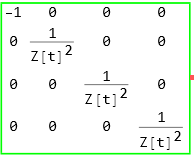

In [186]:
g[a, b]

X[t[]]                 X[t[]]
CTensor[{{-X[t[]], 0, 0, 0}, {0, -------, 0, 0}, {0, 0, -------, 0}, 
                                       2                      2
                                 Z[t[]]                 Z[t[]]
 
                X[t[]]
>     {0, 0, 0, -------}}, {-Cartesian, Cartesian}, 0][-a, b]
                      2
                Z[t[]]
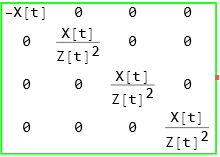

In [187]:
F = CTensor[matrixComponent, {-Cartesian, -Cartesian}];
F[-a, b]

In [189]:
CD = LC[g];

In [190]:
CD[c]@g[a, b]

0

In [191]:
CD[a]@F[-a, -b]

2
                    3 X[t[]] (1 + Z[t[]] ) Z'[t[]]
CTensor[{-X'[t[]] - ------------------------------, 0, 0, 0}, {-Cartesian}, 0][-b]
                                     3
                               Z[t[]]

2
                    3 X[t[]] (1 + Z[t[]] ) Z'[t[]]
CTensor[{-X'[t[]] - ------------------------------, 0, 0, 0}, {-Cartesian}, 0][-b]
                                     3
                               Z[t[]]
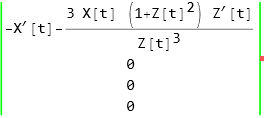

In [192]:
xAct`xCoba`$LargeComponentSize = 3000;
CD[a]@F[-a, -b]

2
          3 Z'[t[]]                         2
CTensor[{{----------, 0, 0, 0}, {0, -Z'[t[]]  - 2 Z[t[]] Z''[t[]], 0, 0}, 
                 2
           Z[t[]]
 
                     2                                            2
>     {0, 0, -Z'[t[]]  - 2 Z[t[]] Z''[t[]], 0}, {0, 0, 0, -Z'[t[]]  - 2 Z[t[]] Z''[t[]]}}
 
>     , {-Cartesian, -Cartesian}, 0][-a, -b]
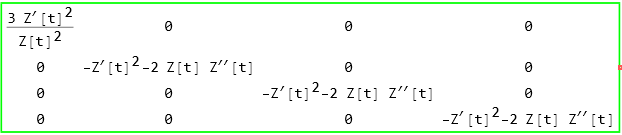

In [194]:
Einstein[CD][-a, -b]

In [1]:
ClearAll["Global`*"];
Quiet@Block[{Print}, << xAct`xPert`]
DefManifold[M, 4, {a, b, c, d}]

** DefManifold: Defining manifold M. 
** DefVBundle: Defining vbundle TangentM. 


In [4]:
PerturbAction[expr_, 
  g_?MetricQ[a_?UpIndexQ, b_?UpIndexQ] | 
   g_?MetricQ[a_?DownIndexQ, b_?DownIndexQ]] := 
 Module[{pertexpr, res, dgloc,(*dummyloc,*)hp},
  
  (* We define the metric perturbation, if not defined already *)
  dgloc = SymbolJoin["\[Delta]", g];
  
  hp = Head@Perturbation[g[DownIndex@a, DownIndex@b]];
  
  If[hp === Perturbation, 
   DefMetricPerturbation[g, dgloc, SymbolJoin["\[Epsilon]", g]], 
   dgloc = hp];
  
  
  Block[{$DefInfoQ = False},
   
   (* We perturb wrt to the metric and if it is the inverse metric we \
put a minus sign *)
   pertexpr = (If[DownIndexQ[a], 1, -1])*
      ToCanonical@
       ContractMetric@ExpandPerturbation@Perturbation[expr] /. 
     Perturbation[tens_] :> 0;
   
   (*We then use VarD. 
   It happens that some trivial Kronecker appear which need to be \
handle manually *)
   res = 
    ToCanonical[(SameDummies@
        ContractMetric@
         VarD[dgloc[LI[1], a, b], CovDOfMetric[g]][pertexpr]) /. 
      delta[-LI[n_], LI[m_]] :> 
       KroneckerDelta[NoScalar[n], NoScalar[m]]];
   ];
  res
  ]
PerturbAction[expr_, tensor_?xTensorQ, covd_] := 
 Module[{res, dummyloc, pertexpr, inds},
  Block[{$DefInfoQ = False},
   
   (* We use a dummy name for the variation of the tensor, 
   and use it to replace the formal first order perturbation the \
tensor *)
   (* So first we define this dummy tensor *)
   dummyloc = SymbolJoin["Var", tensor];
   inds = DummyIn /@ SlotsOfTensor[tensor];
   If[! xTensorQ[dummyloc], 
    DefTensor[dummyloc @@ inds, First@DependenciesOfTensor@tensor]];
   SymmetryGroupOfTensor[dummyloc] ^= SymmetryGroupOfTensor[tensor];
   
   (* Then we perturb the action and replace Perturbation[
   Tensor[..]] by this dummy tensor *)
   pertexpr = (ToCanonical@
      ContractMetric[
       ExpandPerturbation@Perturbation[expr] /. 
         Perturbation[tens_?((# =!= tensor) &)[ar___]] :> 0 /. 
        Perturbation[tensor[ind___]] :> dummyloc[ind]]);
   
   (* With this simple head, VarD works correctly. 
   Again we need to handel some trivial Kronecker *)
   res = 
    ToCanonical[(SameDummies@
        ContractMetric@VarD[dummyloc @@ inds, covd][pertexpr]) /. 
      delta[-LI[n_], LI[m_]] :> 
       KroneckerDelta[NoScalar[n], NoScalar[m]]];
   ];
  res
  ]
PerturbAction[expr_, tensor_[inds___]] := 
 PerturbAction[expr, tensor[inds], CovDOfMetric@First@$Metrics]
PerturbAction[expr_, tensor_?xTensorQ[inds___], covd_] := 
 Module[{res, dummyloc, pertexpr},
  Block[{$DefInfoQ = False},
   dummyloc = SymbolJoin["Var", tensor];
   
   If[! xTensorQ[dummyloc], 
    DefTensor[dummyloc[inds], First@DependenciesOfTensor@tensor]];
   SymmetryGroupOfTensor[dummyloc] ^= SymmetryGroupOfTensor[tensor];
   
   (* Perturbation with xPert*)
   pertexpr = (ToCanonical@
      ContractMetric[
       ExpandPerturbation@Perturbation[expr] /. 
         Perturbation[tens_?((# =!= tensor) &)[ar___]] :> 0 /. 
        Perturbation[tensor[ind___]] :> dummyloc[ind]]);
   (* VarD and removal of KroneckerDelta*)
   res = 
    ToCanonical[(SameDummies@
        ContractMetric@VarD[dummyloc[inds], covd][pertexpr]) /. 
      delta[-LI[n_], LI[m_]] :> 
       KroneckerDelta[NoScalar[n], NoScalar[m]]];
   ];
  res
  ]

In [8]:
VarAction[expr_, 
  g_?MetricQ[as__?((UpIndexQ[#] || DownIndexQ[#]) &)]] := 
 Module[{sqrtg},
  sqrtg = Sqrt[SignDetOfMetric[g] Determinant[g][]];
  ToCanonical[
   PerturbAction[expr, g[as]] + 
    ReplaceDummies@expr*PerturbAction[sqrtg, g[as]]/sqrtg ]
  ]
VarAction[expr_, tensor_?((xTensorQ[#] && Not[MetricQ[#]]) &), 
  g_?MetricQ] := PerturbAction[expr, tensor, CovDOfMetric[g]]
VarAction[expr_, tensor_?((xTensorQ[#] && Not[MetricQ[#]]) &)] := 
  VarAction[expr, tensor, First@$Metrics];

VarAction[expr_, 
  tensor_?((xTensorQ[#] && Not[MetricQ[#]]) &)[inds___], g_?MetricQ] :=
  PerturbAction[expr, tensor[inds], CovDOfMetric[g]]
VarAction[expr_, 
   tensor_?((xTensorQ[#] && Not[MetricQ[#]]) &)[inds___]] := 
  VarAction[expr, tensor[inds], First@$Metrics];

In [13]:
DefTensor[A[-a], M]
DefTensor[\[Phi][], M]
DefTensor[F[-a, -b], M, Antisymmetric[{-a, -b}]]
DefScalarFunction[V]
IndexSetDelayed[F[a_, b_], CD[a][A[b]] - CD[b][A[a]]]

** DefTensor: Defining tensor A[-a]. 
** DefTensor: Defining tensor \[Phi][]. 
** DefTensor: Defining tensor F[-a, -b]. 
** DefScalarFunction: Defining scalar function V. 


In [18]:
DefMetric[-1, g[-a, -b], CD, {";", "\[Del]"}, PrintAs -> "g"];

** DefTensor: Defining symmetric metric tensor g[-a, -b]. 
** DefTensor: Defining antisymmetric tensor epsilong[-a, -b, -c, -d]. 
** DefTensor: Defining tetrametric Tetrag[-a, -b, -c, -d]. 
** DefTensor: Defining tetrametric Tetrag\[Dagger][-a, -b, -c, -d]. 
** DefCovD: Defining covariant derivative CD[-a]. 
** DefTensor: Defining vanishing torsion tensor TorsionCD[a, -b, -c]. 
** DefTensor: Defining symmetric Christoffel tensor ChristoffelCD[a, -b, -c]. 
** DefTensor: Defining Riemann tensor RiemannCD[-a, -b, -c, -d]. 
** DefTensor: Defining symmetric Ricci tensor RicciCD[-a, -b]. 
** DefCovD:  Contractions of Riemann automatically replaced by Ricci.
** DefTensor: Defining Ricci scalar RicciScalarCD[]. 
** DefCovD:  Contractions of Ricci automatically replaced by RicciScalar.
** DefTensor: Defining symmetric Einstein tensor EinsteinCD[-a, -b]. 
** DefTensor: Defining Weyl tensor WeylCD[-a, -b, -c, -d]. 
** DefTensor: Defining symmetric TFRicci tensor TFRicciCD[-a, -b]. 
** DefTensor: 

CD[-a][ϕ[]] CD[a][ϕ[]]
-V[ϕ[]] + ----------------------
                    2
g[-a, -b] V[ϕ[]]   CD[-a][ϕ[]] CD[-b][ϕ[]]   g[-a, -b] CD[-c][ϕ[]] CD[c][ϕ[]]
---------------- + ----------------------- - --------------------------------
       2                      2                             4
-CD[-a][CD[a][ϕ[]]] - V'[ϕ[]]
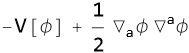
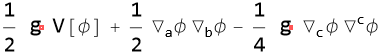

In [28]:
L = 1/2 CD[a]@\[Phi][] CD[-a]@\[Phi][] - V[\[Phi][]]
VarAction[L, g[a, b]]
VarAction[L, \[Phi][]]

(CD[-a][A[-b]] - CD[-b][A[-a]]) (CD[a][A[b]] - CD[b][A[a]])
-----------------------------------------------------------
                             4
CD[-a][A[c]] CD[-b][A[-c]]   CD[-b][A[-c]] CD[c][A[-a]]   CD[-c][A[-b]] CD[c][A[-a]]
-------------------------- - -------------------------- + -------------------------- - 
            2                            2                            2
 
    CD[-a][A[-c]] CD[c][A[-b]]   g[-a, -b] CD[-c][A[-d]] CD[d][A[c]]
>   -------------------------- + ----------------------------------- - 
                2                                 4
 
    g[-a, -b] CD[-d][A[-c]] CD[d][A[c]]
>   -----------------------------------
                     4
CD[-b][CD[-a][A[b]]] - CD[-b][CD[b][A[-a]]]
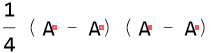
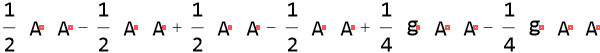

In [37]:
L = F[a, b] F[-a, -b]/4
VarAction[L, g[a, b]]
VarAction[L, A[a]]

RicciScalarCD[]
                  g[-a, -b] RicciScalarCD[]
RicciCD[-a, -b] - -------------------------
                              2
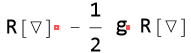

In [40]:
L = RicciScalarCD[]
VarAction[L, g[a, b]]

In [42]:
%//TeXForm

\text{RicciCD}(-a,-b)-\frac{1}{2} \text{RicciScalarCD}() g(-a,-b)